In [22]:
import numpy as np

## HW Rain Tests

In [23]:
rain = [True, False]

In [24]:
def did_today_rain(rained_yesterday, rained_day_before):
    if rained_yesterday and rained_day_before:
        prob_rain = 0.7
    elif rained_yesterday and not rained_day_before:
        prob_rain = 0.5
    elif not rained_yesterday and rained_day_before:
        prob_rain = 0.4
    else:        
        prob_rain = 0.1
    rained_today = np.random.uniform(low=0, high=1) < prob_rain
    return rained_today

In [44]:
history = []
for _ in range(2):
    history.append(np.random.choice(rain))

In [45]:
N = 1000000

In [46]:
for _ in range(N):
    rained_yesterday, rained_day_before = history[-1], history[-2]
    rained_today = did_today_rain(rained_yesterday, rained_day_before)
    history.append(rained_today)

In [47]:
print(f"Fraction of days rained = {sum(history)/len(history)}")

Fraction of days rained = 0.27611544776910446


## Test Out Matrix Form

In [48]:
P = np.array([[0.9, 0.1,   0,   0],
              [  0,   0, 0.5, 0.5],
              [0.6, 0.4,   0,   0],
              [  0,   0, 0.3, 0.7]])

In [49]:
v = np.array([0.25, 0.25, 0.25, 0.25])

In [54]:
v = np.array([0, 1, 0, 0])

In [67]:
pi = v@np.linalg.matrix_power(P, 1000000)

In [70]:
pi

array([0.62068966, 0.10344828, 0.10344828, 0.17241379])

In [71]:
pi@P

array([0.62068966, 0.10344828, 0.10344828, 0.17241379])

In [82]:
w, v = np.linalg.eig(P.T)

In [83]:
w

array([ 1.        ,  0.72036798, -0.35499389,  0.23462591])

In [84]:
v

array([[-0.93959235,  0.80489068, -0.30644754,  0.38209111],
       [-0.15659873, -0.02207255, -0.63592204, -0.55952858],
       [-0.15659873, -0.24097357,  0.64098298, -0.42372254],
       [-0.26099788, -0.54184456,  0.3013866 ,  0.60116001]])

In [88]:
v[:, 0] / sum(v[:, 0])

array([0.62068966, 0.10344828, 0.10344828, 0.17241379])

In [89]:
P = np.array([ [1/2, 1/2,   0],
               [1/3,   0, 2/3],
               [  0, 1/3, 2/3]])

In [90]:
w, v = np.linalg.eig(P.T)

In [91]:
w

array([-0.39538022,  0.56204689,  1.        ])

In [92]:
v

array([[ 0.30071384,  0.63997749,  0.28571429],
       [-0.80775968,  0.11912583,  0.42857143],
       [ 0.50704584, -0.75910332,  0.85714286]])

In [93]:
v[:, 2] / sum(v[:, 2])

array([0.18181818, 0.27272727, 0.54545455])

In [95]:
2/11

0.18181818181818182

In [97]:
2/3 / (2/3 + 1 + 2)

0.18181818181818182

In [229]:
white_balls = [True for _ in range(8)]
p = 0.5
N = 1000000
history = []
history.append(sum(white_balls))

In [230]:
for _ in range(N):
    index = np.random.randint(low=0, high=len(white_balls))
    if np.random.uniform(low=0, high=1) < p:
        white_balls[index] = True
    else:
        white_balls[index] = False
    history.append(sum(white_balls))

In [231]:
import matplotlib.pyplot as plt

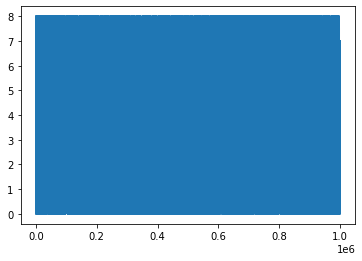

In [232]:
plt.plot(history)

In [233]:
m = {}
for x in history:
    if x not in m:
        m[x] = 1
    else:
        m[x] += 1

xs = [x for x in m]
xs.sort()
for x in xs:
    print(f"{x} - {m[x]/N}")

0 - 0.003742
1 - 0.031129
2 - 0.108442
3 - 0.217966
4 - 0.273571
5 - 0.219814
6 - 0.109791
7 - 0.031584
8 - 0.003962


In [234]:
P = []
P.append([1-p, p, 0, 0, 0, 0, 0, 0])
for i in range(1, 7):
    row = []
    for j in range(i-1):
        row += [0]
    row.append(i/8 * (1-p))
    row.append((8-i)/8 + p*(2*i-8)/8)
    row.append((8-i)/8*p)
    for j in range(i+2, 8):
        row += [0]
    P.append(row)
P.append([0,0,0,0,0,0, 1-p, p])

In [235]:
P = np.array(P)

In [236]:
P

array([[0.5   , 0.5   , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.0625, 0.5   , 0.4375, 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.125 , 0.5   , 0.375 , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.1875, 0.5   , 0.3125, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.25  , 0.5   , 0.25  , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.3125, 0.5   , 0.1875, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.375 , 0.5   , 0.125 ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.5   , 0.5   ]])

In [237]:
P.shape

(8, 8)

In [238]:
v = np.array([1] + 7*[0])

In [239]:
v

array([1, 0, 0, 0, 0, 0, 0, 0])

In [240]:
v@np.linalg.matrix_power(P, 10000000)

array([0.00393701, 0.03149606, 0.11023622, 0.22047244, 0.27559055,
       0.22047244, 0.11023622, 0.02755906])

In [241]:
np.linalg.matrix_power(P, 10000000)

array([[0.00393701, 0.03149606, 0.11023622, 0.22047244, 0.27559055,
        0.22047244, 0.11023622, 0.02755906],
       [0.00393701, 0.03149606, 0.11023622, 0.22047244, 0.27559055,
        0.22047244, 0.11023622, 0.02755906],
       [0.00393701, 0.03149606, 0.11023622, 0.22047244, 0.27559055,
        0.22047244, 0.11023622, 0.02755906],
       [0.00393701, 0.03149606, 0.11023622, 0.22047244, 0.27559055,
        0.22047244, 0.11023622, 0.02755906],
       [0.00393701, 0.03149606, 0.11023622, 0.22047244, 0.27559055,
        0.22047244, 0.11023622, 0.02755906],
       [0.00393701, 0.03149606, 0.11023622, 0.22047244, 0.27559055,
        0.22047244, 0.11023622, 0.02755906],
       [0.00393701, 0.03149606, 0.11023622, 0.22047244, 0.27559055,
        0.22047244, 0.11023622, 0.02755906],
       [0.00393701, 0.03149606, 0.11023622, 0.22047244, 0.27559055,
        0.22047244, 0.11023622, 0.02755906]])

In [218]:
P_ = P
sums = [P[-1,-1]]
for _ in range(10000000):
    P_ = P_@P
    sums.append(sums[-1] + P_[-1,-1])

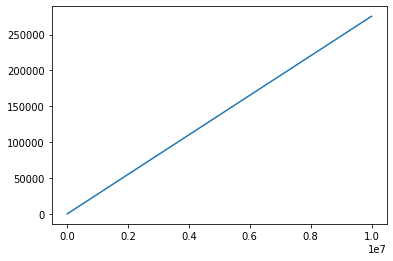

In [219]:
plt.plot(sums)

In [242]:
w, v = np.linalg.eig(P.T)

In [243]:
w

array([-5.55111512e-17,  1.29843508e-01,  2.71288646e-01,  4.22619202e-01,
        1.00000000e+00,  5.77380798e-01,  8.70156492e-01,  7.28711354e-01])

In [244]:
v[:, 4]/sum(v[:, 4])

array([0.00393701, 0.03149606, 0.11023622, 0.22047244, 0.27559055,
       0.22047244, 0.11023622, 0.02755906])

In [181]:
P = np.array([[0,0,1,0,0],
              [1/2, 0, 1/2, 0, 0],
              [1,0,0,0,0],
              [0,0,0,1/2,1/2],
              [0,0,0,0,1]])

In [185]:
np.linalg.matrix_power(P, 10000000)

array([[1. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. ]])

In [250]:
P = []
P.append([1-p, p, 0, 0, 0, 0, 0, 0, 0])
for i in range(1, 8):
    row = []
    for j in range(i-1):
        row += [0]
    row.append(i/8 * (1-p))
    row.append((8-i)/8 + p*(2*i-8)/8)
    row.append((8-i)/8*p)
    for j in range(i+2, 9):
        row += [0]
    P.append(row)
P.append([0,0,0,0,0,0, 0,1-p, p])

In [252]:
P = np.array(P)

In [253]:
P.shape

(9, 9)

In [254]:
v = np.array([1] + 7*[0])

In [255]:
np.linalg.matrix_power(P, 10000000)

array([[0.00390625, 0.03125   , 0.109375  , 0.21875   , 0.2734375 ,
        0.21875   , 0.109375  , 0.03125   , 0.00390625],
       [0.00390625, 0.03125   , 0.109375  , 0.21875   , 0.2734375 ,
        0.21875   , 0.109375  , 0.03125   , 0.00390625],
       [0.00390625, 0.03125   , 0.109375  , 0.21875   , 0.2734375 ,
        0.21875   , 0.109375  , 0.03125   , 0.00390625],
       [0.00390625, 0.03125   , 0.109375  , 0.21875   , 0.2734375 ,
        0.21875   , 0.109375  , 0.03125   , 0.00390625],
       [0.00390625, 0.03125   , 0.109375  , 0.21875   , 0.2734375 ,
        0.21875   , 0.109375  , 0.03125   , 0.00390625],
       [0.00390625, 0.03125   , 0.109375  , 0.21875   , 0.2734375 ,
        0.21875   , 0.109375  , 0.03125   , 0.00390625],
       [0.00390625, 0.03125   , 0.109375  , 0.21875   , 0.2734375 ,
        0.21875   , 0.109375  , 0.03125   , 0.00390625],
       [0.00390625, 0.03125   , 0.109375  , 0.21875   , 0.2734375 ,
        0.21875   , 0.109375  , 0.03125   , 0.00390625],


In [256]:
P = np.array([[2/3, 0/1, 1/6, 0/1, 1/6, 0/1],
              [0/1, 2/3, 1/6, 0/1, 1/6, 0/1],
              [2/3, 0/1, 1/6, 0/1, 0/1, 1/6],
              [2/3, 0/1, 0/1, 1/6, 0/1, 1/6],
              [0/1, 2/3, 0/1, 1/6, 1/6, 0/1],
              [0/1, 2/3, 0/1, 1/6, 0/1, 1/6]])

In [258]:
np.linalg.matrix_power(P, 10000)

array([[0.33333333, 0.33333333, 0.13333333, 0.03333333, 0.13333333,
        0.03333333],
       [0.33333333, 0.33333333, 0.13333333, 0.03333333, 0.13333333,
        0.03333333],
       [0.33333333, 0.33333333, 0.13333333, 0.03333333, 0.13333333,
        0.03333333],
       [0.33333333, 0.33333333, 0.13333333, 0.03333333, 0.13333333,
        0.03333333],
       [0.33333333, 0.33333333, 0.13333333, 0.03333333, 0.13333333,
        0.03333333],
       [0.33333333, 0.33333333, 0.13333333, 0.03333333, 0.13333333,
        0.03333333]])

In [260]:
v = np.array([0]*5 + [1])

In [265]:
v@np.linalg.matrix_power(P, 3)

array([0.18518519, 0.48148148, 0.12962963, 0.03703704, 0.12962963,
       0.03703704])

In [267]:
sums = []
sums.append(0)
for _ in range(30):
    v = v@P
    sums.append(sums[-1] + v[-1])
for i, x in enumerate(sums):
    print(f"{i} - {x}")

0 - 0
1 - 0.0333333333333333
2 - 0.0666666666666666
3 - 0.0999999999999999
4 - 0.1333333333333332
5 - 0.1666666666666665
6 - 0.1999999999999998
7 - 0.2333333333333331
8 - 0.2666666666666664
9 - 0.2999999999999997
10 - 0.333333333333333
11 - 0.36666666666666625
12 - 0.3999999999999996
13 - 0.4333333333333329
14 - 0.46666666666666623
15 - 0.49999999999999956
16 - 0.5333333333333329
17 - 0.5666666666666662
18 - 0.5999999999999995
19 - 0.6333333333333329
20 - 0.6666666666666662
21 - 0.6999999999999995
22 - 0.7333333333333328
23 - 0.7666666666666662
24 - 0.7999999999999995
25 - 0.8333333333333328
26 - 0.8666666666666661
27 - 0.8999999999999995
28 - 0.9333333333333328
29 - 0.9666666666666661
30 - 0.9999999999999994


In [268]:
w, v = np.linalg.eig(P.T)

In [269]:
w

array([1.00000000e+00+0.00000000e+00j, 6.66666667e-01+0.00000000e+00j,
       1.66666667e-01+0.00000000e+00j, 2.13608883e-17+3.22568097e-17j,
       2.13608883e-17-3.22568097e-17j, 1.66666667e-01+0.00000000e+00j])

In [271]:
v[:, 0]/sum(v[:, 0])

array([0.33333333+0.j, 0.33333333+0.j, 0.13333333+0.j, 0.03333333+0.j,
       0.13333333+0.j, 0.03333333+0.j])

In [294]:
P = np.array([[0.5, 0.5, 0],
              [0.0, 0.5, 0.5],
              [1,0,0]])

In [295]:
np.linalg.matrix_power(P, 2)

array([[0.25, 0.5 , 0.25],
       [0.5 , 0.25, 0.25],
       [0.5 , 0.5 , 0.  ]])

In [274]:
w, v = np.linalg.eig(P.T)

In [275]:
w

array([1.00000000e+00+0.j , 1.73472348e-16+0.5j, 1.73472348e-16-0.5j])

In [276]:
v

array([[-0.66666667+0.j        ,  0.70710678+0.j        ,
         0.70710678-0.j        ],
       [-0.66666667+0.j        , -0.35355339-0.35355339j,
        -0.35355339+0.35355339j],
       [-0.33333333+0.j        , -0.35355339+0.35355339j,
        -0.35355339-0.35355339j]])

In [277]:
v[:, 0] / sum(v[:, 0])

array([0.4-0.j, 0.4-0.j, 0.2-0.j])

In [285]:
P_= np.array([[0.0, 0.5, 0.5],
              [1/4, 0.5, 1/4],
              [3/4, 1/4 ,0.0]])

In [286]:
w, v = np.linalg.eig(P_.T)

In [287]:
w

array([ 1.        , -0.60355339,  0.10355339])

In [288]:
v

array([[-0.51465024, -0.79410449,  0.47596315],
       [-0.73521462,  0.23258782, -0.81251992],
       [-0.44112877,  0.56151667,  0.33655677]])

In [289]:
v[:, 0] / sum(v[:, 0])

array([0.30434783, 0.43478261, 0.26086957])

In [290]:
1/0.30434783*

3.2857142434693882

In [291]:
np.linalg.matrix_power(P_, 10000)

array([[0.30434783, 0.43478261, 0.26086957],
       [0.30434783, 0.43478261, 0.26086957],
       [0.30434783, 0.43478261, 0.26086957]])